# Data Management

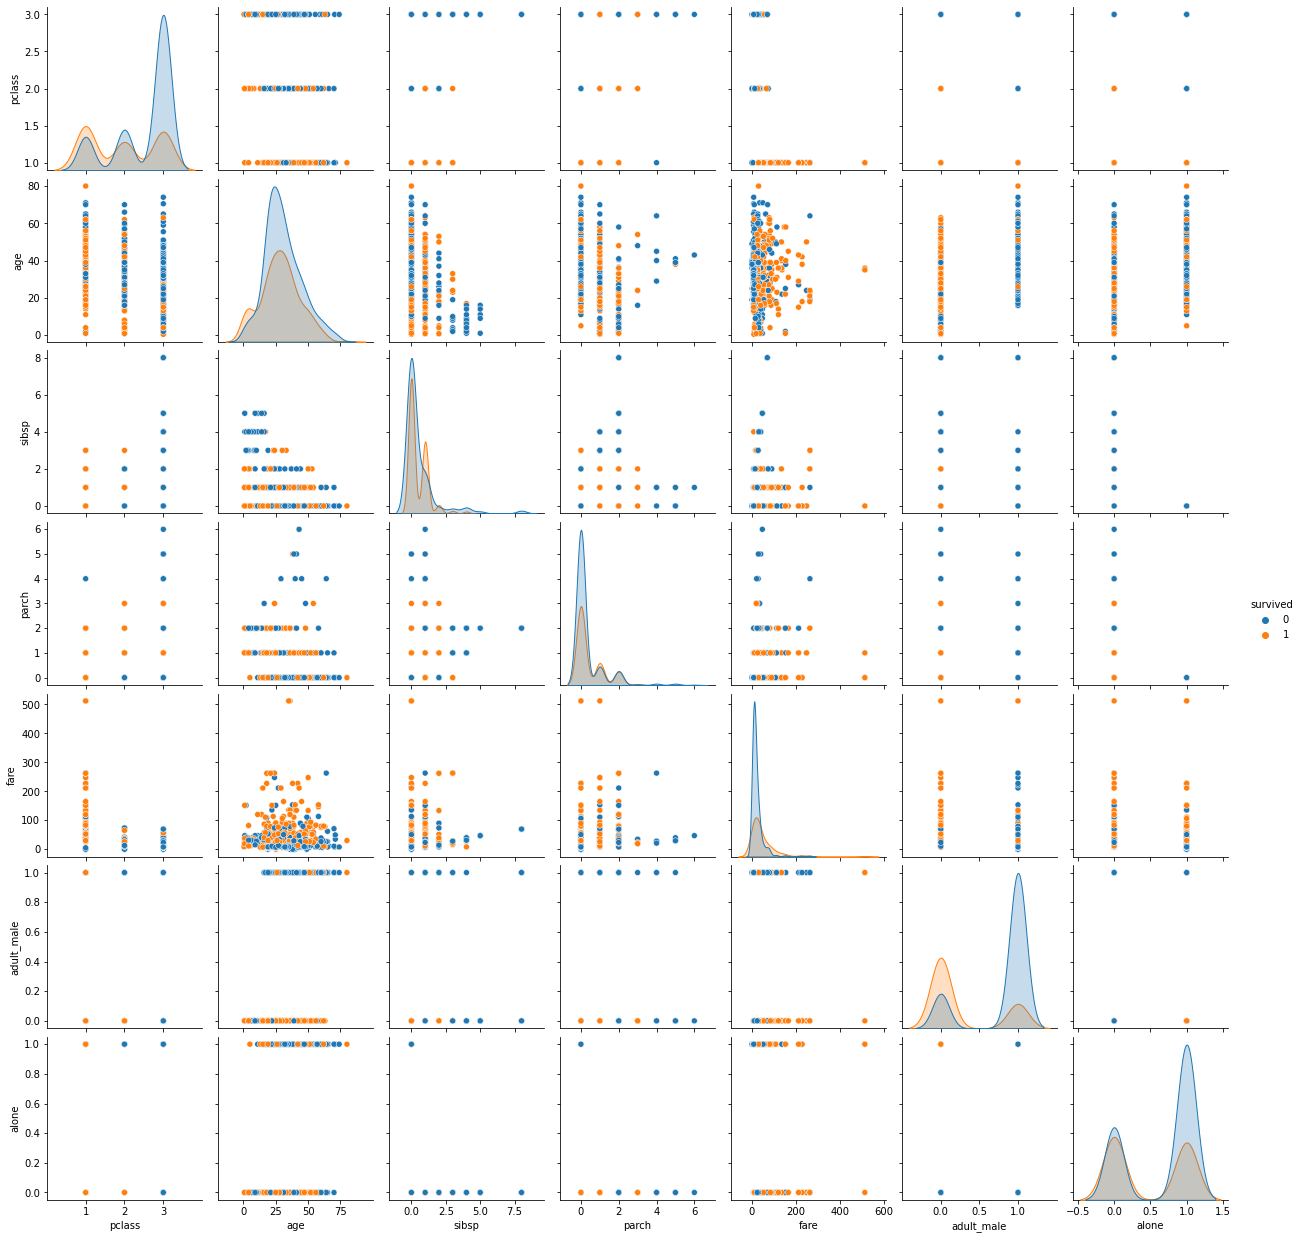

In [2]:
# USE PAIRSPLOT to QUICKLY FIND VISUAL CORRELATIONS

import seaborn as sns
import matplotlib.pyplot as plt
dat = sns.load_dataset("titanic")

sns.pairplot(data= dat, hue="survived")
plt.show()

In [ ]:
x = cancer.data 
y = cancer.target
labels = cancer.target_names
features = cancer.feature_names

In [ ]:
# EXPLORE / DISPLAY INFO ABOUT DATASET
data.describe()
data.head()
data.info()


In [ ]:
# NORMALIZE / SCALE DATA
from sklearn.preprocessing import StandardScaler

# normalize dataset
# https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/
scaler = MinMaxScaler(feature_range=(0, 1))
xn = scaler.fit_transform(x)
# IMPORTANT! data treating comes BEFORE the SPLITING into training and test sets

# SCALE DATAFRAME (pandas)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)  # fit finds mean+std, tranform applies the scaling --> returns ndarray not df
X_train_scale = pd.DataFrame(X_train_scale, columns=X.columns)
X_train_scale.hist(bins=50, figsize=(20, 15))
X_train = X_train_scale

# PIPELINES (1)
pipe_lr = make_pipeline(StandardScaler(),
LogisticRegression(random_state=1, solver='liblinear'))
#LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Train Accuracy: %.3f' % pipe_lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

# PIPELINES (2)
# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train,y_train)
pred_test_std = std_clf.predict(X_test)


In [ ]:
# FEATURE ENGINEERING
import pandas as pd
import re  # regex
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
survived_train = df_train.Survived
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])
data.head()
data.info()  # are there missing values 'non-null object'

# combine / translate some labels
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})

# add a new feature
data['Has_Cabin'] = ~data.Cabin.isnull()

# replace values with NaN
data.replace(0, np.nan,inplace=True)

# Drop irrelevant feature columns
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

# Drop NaN
data.dropna(axis=0,inplace=True)

# Impute missing values with a mean value
data['Age'] = data.Age.fillna(data.Age.median())

# Bin data. Instead of Age in Years --> Group them into Age Groups
data['CatAge'] = pd.qcut(data.Age, q=4, labels=False )

# Transform into binary variables
# data.title {"Mr.", "Mrs."} turns into the encoded categories: data.Title_Mr {True,False} and data.Title_Mrs {True,False}
data_dum = pd.get_dummies(data, drop_first=True)


In [ ]:
# TEST SET SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=3, test_size=0.1);
print ("Trainingset Size:", len(x_train))
print ("Testset Size:", len(x_test))

# pandas.datagrame.loc
X_train, X_test, y_train, y_test = train_test_split(pima.loc[:,X_names.values],pima.HasDiabetes,train_size=0.8)


# VALIDATION SET SPLIT
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print ("Trainingset Size:", len(X_train_val))
print ("Validationset Size:", len(X_val))
print ("Testset Size:", len(X_test))


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5);
knn.fit(X_train, y_train);

y_pred = knn.predict(X_test)


In [ ]:
# PERFORMANCE MEASUREMENTS
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy_score(y_test, y_pred)

conf = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print(confusion_matrix(y_test, y_pred))
#    [[TP FP]
#     [FN TN]]

# binary case:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred)

sns.heatmap(conf, annot=True, fmt='d', cbar=False, cmap="coolwarm_r", xticklabels=labels, yticklabels=labels, linewidth = 1)
plt.title("confusion matrix")
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# ROC / RPC CURVES (recall precision)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label = 'random classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def plot_rpc(recall, precision):
    plt.plot(recall, precision, color='orange', label='RPC')
    plt.ylabel('Precision')
    plt.xlabel('Recall = True Positive Rate')
    plt.title('Recall-Precision Curve')
    plt.legend()
    plt.show()

# Predict probabilities for the test
probs = knn.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# plot RPC
plot_rpc(recall, precision)

average_precision = average_precision_score(testy, probs)
print("Average Precision: " , round(average_precision,3))

In [ ]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score

best_acc = 0;
best_k = 0;
for k in range (1,101):
    # Fit model to test data
    knn = KNeighborsClassifier(n_neighbors=k);
    knn.fit(x_train_1, y_train_1);
    # Get predictions on test set
    y_pred_1 = knn.predict(x_test_1)

    # create performance measurements
    acc = accuracy_score(y_test_1, y_pred_1)
    if(acc > best_acc):
        best_acc = acc;
        best_k = k;
        print("Better Accuracy: ", acc)

print("Best accuracy of:", best_acc, "at k=", best_k)

# ---

scores = np.array([])
scores_std =np.array([])
for k in range(1,100):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_k, x_train, y_train, cv=10)
    scores = np.append(scores, np.mean(cv_scores) )
    scores_std = np.append(scores_std, np.std(cv_scores))

best_k = np.argmax(scores)+1
best_score = scores[best_k]

plt.plot(scores)
plt.title("best k at {} with score of {}".format(best_k, round(best_score,3)))
plt.fill_between(range(0, len(scores)), scores + scores_std, scores - scores_std, alpha=0.15, color='blue')
plt.axvline(x=best_k, c="k",  ls="--")
plt.show()

# ---
from sklearn import model_selection
C = 0.81

svc = svm.SVC(kernel='linear', C=C)
loo = model_selection.LeaveOneOut()
# svc.fit(...).score() gives 1 if prediction is correct 0 otherwise 
res = [svc.fit(X[train], y[train]).score(X[test], y[test]) for train, test in loo.split(X)]
#res is a vector with 0,1
print(np.mean(res)) #The average accuracy


In [ ]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier, plot_tree

# clf = DecisionTreeClassifier(random_state=0)
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=11, max_depth=6)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_tree(clf, filled=True, feature_names=cancer.feature_names)
plt.show()


In [ ]:
# RANDOM FORREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, oob_score=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)



In [ ]:
# which features are most important ?
importances = clf.feature_importances_

indices = np.argsort(importances)
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()




In [ ]:
# HYPERPARAMETER TUNING
clf = tree.DecisionTreeClassifier()
clf_cv = GridSearchCV(clf, param_grid=param_grid, cv=5)
clf_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

In [ ]:
# SVC / SVM - SUPPORT VECTOR MACHINE
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
# with RADIAL BASIS FUNCTION kernel RBF
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model=SVC(kernel='rbf', gamma=1, C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: %f' % accuracy_score(y_test, y_pred))

# cross validated GRID SEARCH
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-3, 3, 7)
param_grid = dict(gamma=gamma_range, C=C_range)

model=SVC()
score = 'accuracy'
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_range,
                     'C': C_range}]
print("# Tuning hyper-parameters for %s" % score)
print()
clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring=score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print(clf.best_score_)
print()
print("Grid scores on development set:")
print()
results = clf.cv_results_
for i in range(len(results["params"])):
    print("%0.3f (+/-%0.03f) for %r" % (results["mean_test_score"][i], results["std_test_score"][i] * 2, results["params"][i]))



In [ ]:
# SVM 
# POLYNOMIAL KERNEL
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2, C=1, gamma=0.10)
model.fit(X_train, y_train)

In [ ]:
# SVM / SVC
# LINEAR KERNEL
from sklearn import svm
C = 0.4  # penalty, must be >0, default=1.0
svc = svm.SVC(kernel='linear', C=C).fit(X,y)

In [ ]:
# SVM - Parameter Optimization
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

n_samples = len(y)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 15, 100, 1000]},
                    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
# decreasing 𝑪 corresponds to more regularization, larger margin, higher tolerance for 
# misclassification, less confidence in the dataset (more noise)
score = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                   scoring=score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
results = clf.cv_results_
for i in range(len(results["params"])):
    print("%0.3f (+/-%0.03f) for %r" % (results["mean_test_score"][i], results["std_test_score"][i] * 2, results["params"][i]))

In [1]:
# SCATTER PLOT 2D
fig, ax = plt.subplots(figsize=(12, 7))
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(X_train.x, X_train.y, c=y_train)
plt.show()

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# pca = PCA(n_components=0.80)
pca.fit(X)

pca.components_
pca.explained_variance_  # explained variance
pca.explained_variance_ratio_
1 - pca.explained_variance_ratio_.sum()

In [ ]:
# PCA - Dimensionality Reduction
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

# reverse the transformation (decompress)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
# PCA - Plot (principal) Vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
# PIPELINES (3) - PCA
# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)
# Show prediction accuracy in unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))
# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
X_train_unscaled=pca.transform(X_train)
pca_std = std_clf.named_steps['pca']
# Show first principal componenets
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

In [ ]:
# PCA 
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
X3D_inv = pca.inverse_transform(X2D)
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

In [ ]:
# Agglomerative Clustering
sklearn.cluster.AgglomerativeClustering

In [ ]:
# Plot Dendrogram
# Import dendrogram and ward clustering from SciPy
from scipy.cluster.hierarchy import dendrogram, ward 
X, y = make_blobs(random_state=0, n_samples=12)
#Perform ward clustering on the data in array X. The function ward in SciPy
returns an array with the #distances bridged in agglomerative clustering
linkage_array = ward(X)
# draw a dendrogram
dendrogram(linkage_array)

In [ ]:
# T-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# PLOT CLUSTER DATA
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y.astype(int), cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [ ]:
# Local Linear Embedding - LLE
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y.astype(int))
plt.show()

from sklearn.pipeline import Pipeline
pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y.astype(int))
plt.show()

In [ ]:
# MDS
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m].astype(int))
plt.show()

from sklearn.pipeline import Pipeline
pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000].astype(int))
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y.astype(int), figsize=(12,12))
plt.show()

In [ ]:
# K-MEANS CLUSTERING
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8, max_iter=300, n_init=10, tol=1e-04)
y_km = km.fit_predict(X)

print('Distortion: %.2f' % km.inertia_)

In [ ]:
# K-MEANS CLUSTERING
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# visualize prediction
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=dot_size, cmap=cmap)

# get centers for plot
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.title('sklearn k-means', fontsize=18, fontweight='demi')

In [ ]:
# ELBOW METHOD K-MEANS CLUSTERING
distortions = []
ScoreList   = []
maxNumberOfClusters=15

for i in range(1, maxNumberOfClusters):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    ScoreList.append(-km.score(X))
    
plt.plot(range(1, maxNumberOfClusters), distortions, marker='o')
plt.plot(range(1, maxNumberOfClusters), ScoreList, marker='^')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.grid(True)
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

In [ ]:
# K-MEANS++
for n_clusters in range(4,8):
    km = KMeans(n_clusters=n_clusters,
                init='k-means++')

    y_km = km.fit_predict(X)
    PlotClusters(X,y, km)
    
##
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

In [ ]:
# SILHOUETTE PLOT
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

In [ ]:
# DISTANCE MATRIX
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist



In [ ]:
# HIERARCHICAL CLUSTERING - LINKAGE - PDIST
# 2. correct approach: Condensed distance matrix
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

# 3. correct approach: Input sample matrix
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

# PLOT DENDROGRAM
from scipy.cluster.hierarchy import dendrogram
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

In [ ]:
# DENSITY BASED - DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

In [ ]:
# SPECTRAL CLUSTERING
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')

labelsS = model.fit_predict(X_mn)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('kernal transform to higher dimension\nlinear separation is possible', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsS, s=dot_size, cmap=cmap)

In [ ]:
# GAUSSIAN MIXTURE MODEL - GMM
import sklearn.mixture as mix
gmm = mix.GaussianMixture(n_components=k, random_state=random_state)
plot_gmm(gmm, X3)


# vvv put this code above ^^^ 
from matplotlib.patches import Ellipse 
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
        
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, 
                            angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    
    fig, ax = plt.subplots(figsize=(9,7))      
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=dot_size, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax=ax, alpha=w * w_factor)

In [ ]:
# PLOT ELBOW CURVE
n_components = np.arange(1, 21)
models = [mix.GaussianMixture(n, covariance_type='full',
                             random_state=random_state).fit(X_mn)
         for n in n_components]

fig, ax = plt.subplots(figsize=(9,7))
ax.plot(n_components, [m.bic(X_mn) for m in models], label='BIC')
ax.plot(n_components, [m.aic(X_mn) for m in models], label='AIC')
ax.axvline(np.argmin([m.bic(X_mn) for m in models]), color='blue')
ax.axvline(np.argmin([m.aic(X_mn) for m in models]), color='green')

plt.legend(loc='best')
plt.xlabel('n_components')